## Mushroom Image classification with Convolutional Neural Networks

Model to identify chanterelles from other mushrooms

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

Go to Google Images and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.


Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ads block add-ons (YouBlock) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [ ]:
folder = 'leaves'
file = 'yellow_leaves.csv'

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [2]:
path = Path("/media/SSD/Mushrooms")
sz=224
path.ls()

[PosixPath('/media/SSD/Mushrooms/test'),
 PosixPath('/media/SSD/Mushrooms/Mushrooms.zip'),
 PosixPath('/media/SSD/Mushrooms/leaves'),
 PosixPath('/media/SSD/Mushrooms/train'),
 PosixPath('/media/SSD/Mushrooms/models'),
 PosixPath('/media/SSD/Mushrooms/yellow_leaves.csv')]

In [3]:
path_train = path / 'train'


In [ ]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file, dest, max_pics=200)

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [4]:
[torch.cuda.is_available(), torch.backends.cudnn.enabled]

[True, True]

In [5]:
bs = 300
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart
num_workers = 5

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.



In [6]:
learn=None
gc.collect()
torch.cuda.empty_cache()

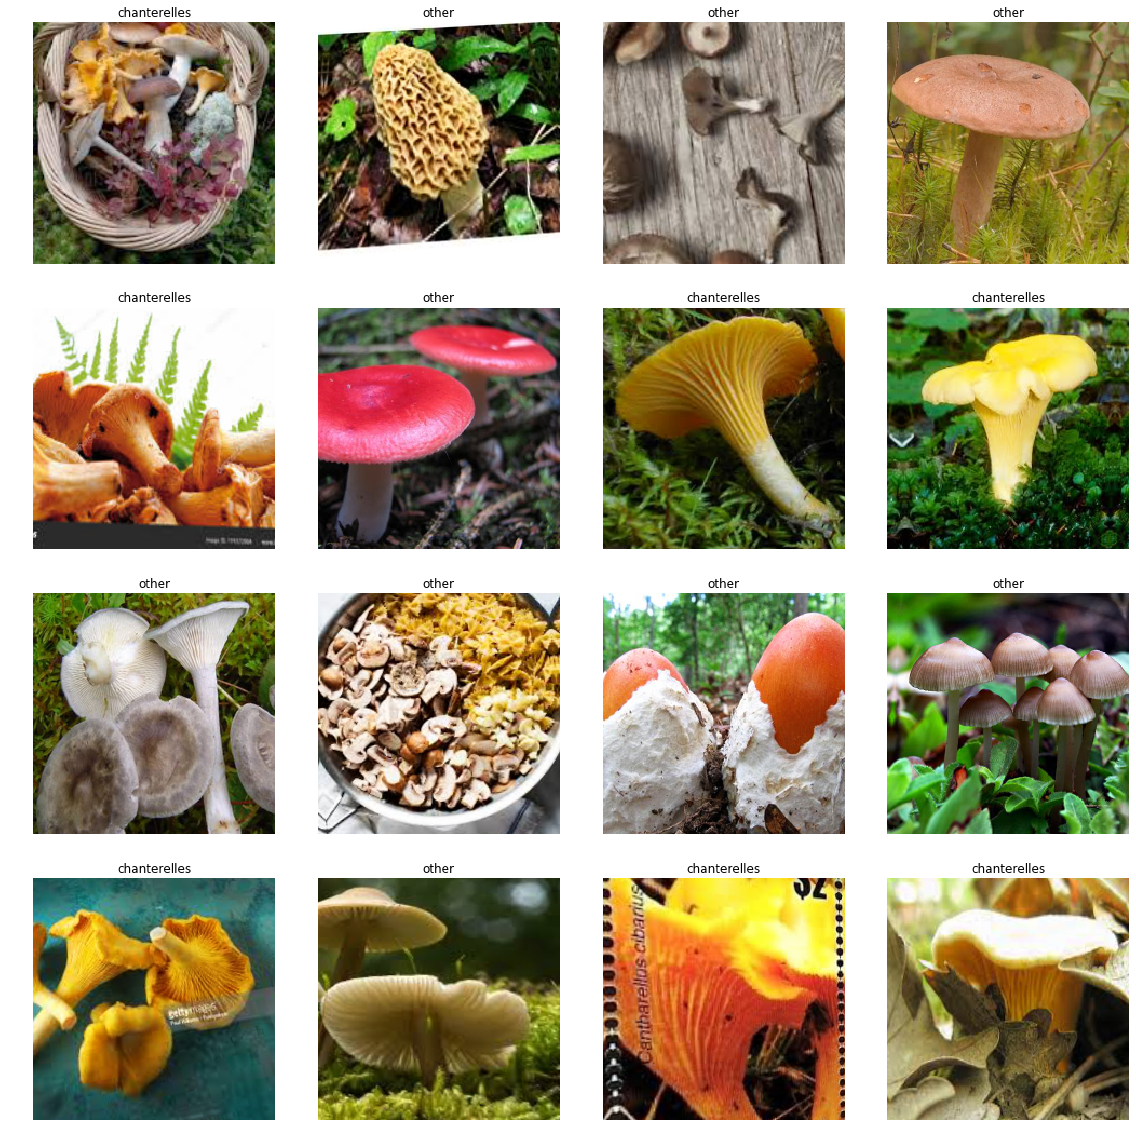

In [7]:
#fastai v1.0
np.random.seed(42)
data = ImageDataBunch.from_folder(path_train,ds_tfms=get_transforms(),valid_pct=0.2,
                                  size=224, bs=bs, num_workers=num_workers).normalize(imagenet_stats)
data.show_batch(rows=4)



In [8]:
#fastai v1.0
#learn = cnn_learner(data, models.resnet18, metrics=accuracy).to_fp16()
learn = cnn_learner(data, models.squeezenet1_1, metrics=accuracy).to_fp16()

In [9]:
learn.freeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.705874,0.282999,0.894389,00:05
1,0.552806,0.257657,0.891089,00:05
2,0.444253,0.211392,0.917492,00:04
3,0.369985,0.205523,0.927393,00:04
4,0.318511,0.162987,0.943894,00:04
5,0.281628,0.143580,0.950495,00:04
6,0.249143,0.140959,0.940594,00:04
7,0.224749,0.141197,0.943894,00:04
8,0.206460,0.140446,0.947195,00:05
9,0.191363,0.139982,0.947195,00:05


In [ ]:
learn.save('mushroom-sqeezenet11-stage-1')

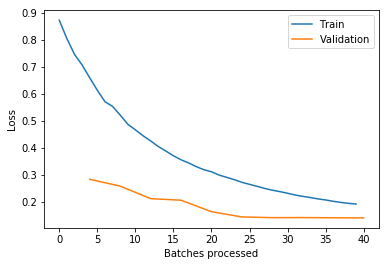

In [10]:
learn.recorder.plot_losses()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(2e-6,2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.186561,0.205357,0.907591,00:06
1,0.172252,0.271355,0.910891,00:05
2,0.150108,0.174866,0.947195,00:05
3,0.142192,0.239127,0.920792,00:05
4,0.132830,0.206468,0.927393,00:05
5,0.128165,0.422672,0.904290,00:05
6,0.124869,1.256389,0.805281,00:05
7,0.123953,0.471801,0.891089,00:05
8,0.118526,0.254080,0.937294,00:05
9,0.115644,0.796010,0.858086,00:05


In [15]:
learn.save('mushroom-squeezenet11-stage-2')

In [16]:
learn.export('squeezenet11_export.pkl')

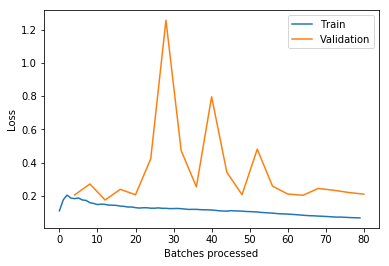

In [12]:
learn.recorder.plot_losses()

In [18]:
learn.to_fp32();

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()


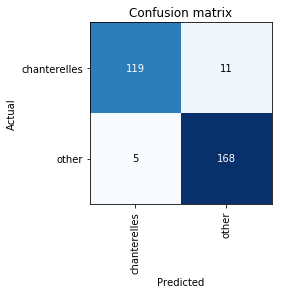

In [20]:
interp.plot_confusion_matrix()

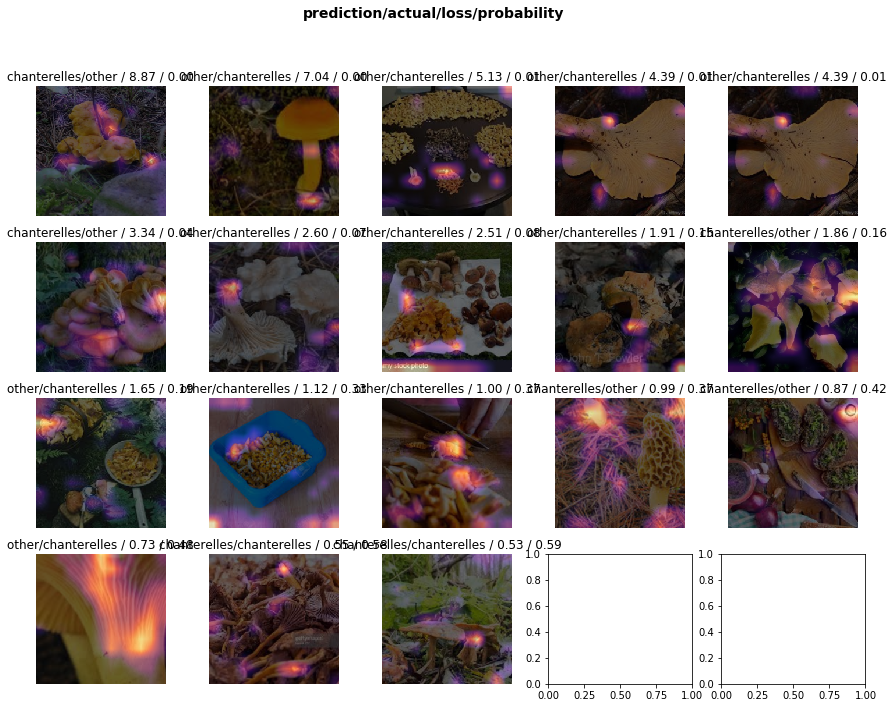

In [21]:
interp.plot_top_losses(18, figsize=(15,11))

In [ ]:
learn.to_fp16();

In [ ]:
img = open_image(path/'test'/'is-3x2.jpeg')
img

In [ ]:
learn = load_learner(path=path_train, file='squeezenet11_export.pkl')
learn.to_fp32();

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class,outputs[0].tolist())


In [ ]:
learn

In [ ]:
cls()